# Elastic Net

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [2]:
session = tf.Session()
iris = datasets.load_iris()

- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [4]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [7]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [12]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss =tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1,l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), e1_term), e2_term), 0)

In [13]:
init = tf.global_variables_initializer()
session.run(init)

In [14]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optimizer.minimize(loss)

In [15]:
loss_vec = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.5200914]
 [0.4984208]
 [0.4907854]], b = [[1.5580761]]Loss: [1.0572469]
Paso #200A = [[0.58955324]
 [0.4641226 ]
 [0.41681755]], b = [[1.5997695]]Loss: [1.0916798]
Paso #300A = [[0.63219184]
 [0.44630012]
 [0.35623336]], b = [[1.6353985]]Loss: [0.95790446]
Paso #400A = [[0.6579313 ]
 [0.43797407]
 [0.30417293]], b = [[1.6672249]]Loss: [0.90074056]
Paso #500A = [[0.6731728 ]
 [0.4363456 ]
 [0.25892112]], b = [[1.6967514]]Loss: [0.8544355]
Paso #600A = [[0.6776544 ]
 [0.4399673 ]
 [0.22028872]], b = [[1.7237463]]Loss: [0.7975718]
Paso #700A = [[0.67621917]
 [0.4432281 ]
 [0.1852043 ]], b = [[1.749084]]Loss: [0.7942939]
Paso #800A = [[0.6737977 ]
 [0.45258257]
 [0.15561682]], b = [[1.7743332]]Loss: [0.7601827]
Paso #900A = [[0.67097676]
 [0.45953038]
 [0.12769707]], b = [[1.7991747]]Loss: [0.8071928]
Paso #1000A = [[0.6647813 ]
 [0.4656632 ]
 [0.10122249]], b = [[1.82265]]Loss: [0.7479795]


In [16]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("y="+str(slope[0][0])+"x1+"+str(slope[1][0])+"x2+"+str(slope[2][0])+"x3+"+str(intercept))

y=0.6647813x1+0.4656632x2+0.10122249x3+1.82265


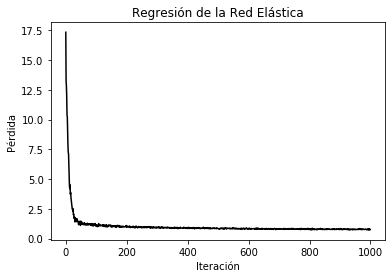

In [17]:
plt.plot(loss_vec, 'k-')
plt.title("Regresión de la Red Elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.show()